"""Problem Statement
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. 
Customer first apply for home loan after that company validates the customer eligibility for loan.

"Problem"

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they
can specifically target these customers. Here they have provided a partial data set."""

In [1]:
"""Data
Variable
Description
Loan_ID
Unique Loan ID
Gender
Male/ Female
Married
Applicant married (Y/N)
Dependents
Number of dependents
Education
Applicant Education (Graduate/ Under Graduate)
Self_Employed
Self employed (Y/N)
ApplicantIncome
Applicant income
CoapplicantIncome
Coapplicant income
LoanAmount
Loan amount in thousands
Loan_Amount_Term
Term of loan in months
Credit_History
credit history meets guidelines
Property_Area
Urban/ Semi Urban/ Rural
Loan_Status
Loan approved (Y/N)"""

'Data\nVariable\nDescription\nLoan_ID\nUnique Loan ID\nGender\nMale/ Female\nMarried\nApplicant married (Y/N)\nDependents\nNumber of dependents\nEducation\nApplicant Education (Graduate/ Under Graduate)\nSelf_Employed\nSelf employed (Y/N)\nApplicantIncome\nApplicant income\nCoapplicantIncome\nCoapplicant income\nLoanAmount\nLoan amount in thousands\nLoan_Amount_Term\nTerm of loan in months\nCredit_History\ncredit history meets guidelines\nProperty_Area\nUrban/ Semi Urban/ Rural\nLoan_Status\nLoan approved (Y/N)'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
## loading dataset

df = pd.read_csv("train_loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- Here are a few inferences, you can draw by looking at the output of describe() function:

    - LoanAmount has (614 – 592) 22 missing values.
    - Loan_Amount_Term has (614 – 600) 14 missing values.
    - Credit_History has (614 – 564) 50 missing values.
    - We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84(Remember,
      Credit_History has value 1 for those who have a credit history and 0 otherwise)
    - The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Here we can see that there are null values present in our dataset

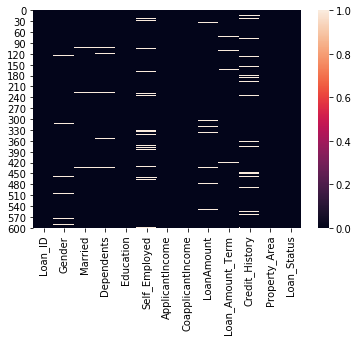

In [8]:
# Let's visualize it 

sb.heatmap(df.isnull())

### Numerical Variable Analysis

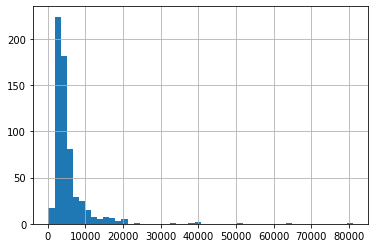

In [9]:
# let's find distribution of numerical column first

df['ApplicantIncome'].hist(bins=50)

In [10]:
# Above we can see that there are outliers present, so to visualize it better lets plot boxplot 

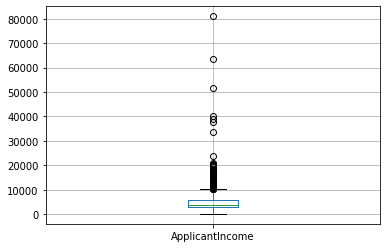

In [11]:
df.boxplot('ApplicantIncome')

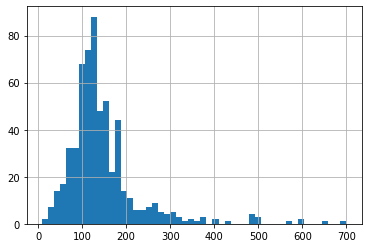

In [12]:
# Similarly we can find for other columns

df["LoanAmount"].hist(bins=50)

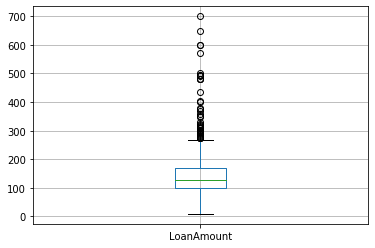

In [13]:
df.boxplot("LoanAmount")

In [14]:
# lets see how many types of gender are present

df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

- So we can see that there are "489" Male's and "112" female's are present

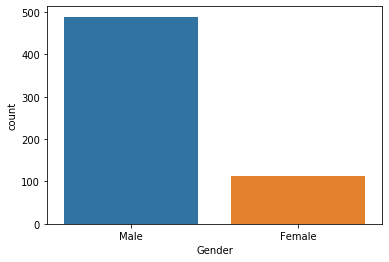

In [15]:
# Lets plot it

sb.countplot(x="Gender", data = df)

In [16]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

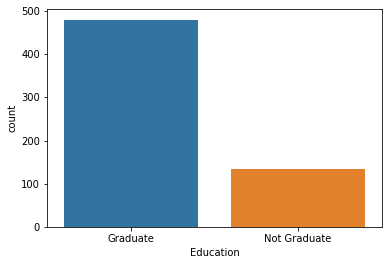

In [17]:
sb.countplot(x="Education", data = df)

- Here we can see there are 480 Graduate people's and 134 Non-Graduate people's are present

In [18]:
# Lets check how many male and female are educated

In [19]:
edu = df.groupby("Gender")["Education"].value_counts()
edu

Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        376
        Not Graduate    113
Name: Education, dtype: int64

- We can say that there are 92 graduated Female and 20 not-graduated Female
- We ca say that there are 376 graduated Male and 113 not-graduated Male

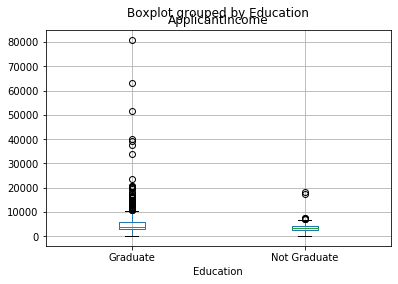

In [20]:
df.boxplot(column='ApplicantIncome', by = 'Education')

- We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

### Categorical variable analysis

In [21]:
# lets how many people are having "Credit History"

In [22]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

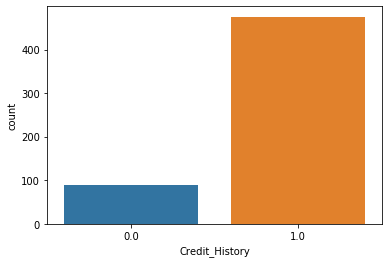

In [23]:
sb.countplot(x="Credit_History", data = df)

- So we can say that arorund 475 poeple's are having Credit History and 89 people are not having Credit History

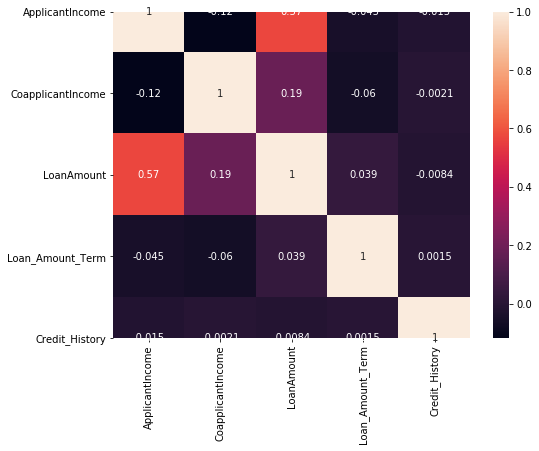

In [24]:
#let's see correlation between the variable's

plt.figure(figsize=(8,6))
sb.heatmap(df.corr(),annot = True)

In [25]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
#lets see Property_Area
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

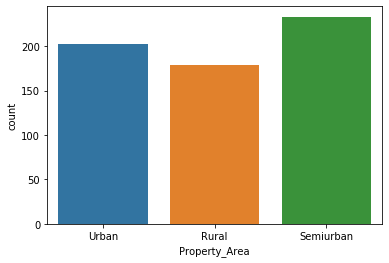

In [29]:
sb.countplot(x="Property_Area",data = df)

- Here we can see that most of the people are from "Semiurban area = 233", then from "Urban Area = 202", and from "Rural Area = 179"

## Data preprocessing

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### As we can see there are null/missing values present in our dataset. So we will do imputation

- For Catagorical column we will impute missing values with its "Mode"
- For Numerical column we will impute missing values with its "Mean" or "Median". But i will use "Median"

In [32]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [33]:
gen_mode = df["Gender"].mode()
gen_mode

0    Male
dtype: object

In [34]:
df["Gender"].fillna("Male",inplace = True)

In [35]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df['Married'].mode()

0    Yes
dtype: object

In [37]:
df['Married'].fillna("Yes",inplace = True)

In [38]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [39]:
df['Dependents'] = df['Dependents'].str.replace('\+','')

In [40]:
df['Dependents'].mode()

0    0
dtype: object

In [41]:
df['Dependents'].fillna(0,inplace=True)

In [42]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [43]:
df['Self_Employed'].mode()

0    No
dtype: object

In [44]:
df['Self_Employed'].fillna("No",inplace = True)

In [45]:
#As we can "LoanAmount" is a numerical column we will fill it with "Median"


In [46]:
df['LoanAmount'].median()

128.0

In [47]:
df['LoanAmount'].fillna(128.0,inplace = True)

In [48]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [49]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [50]:
df['Loan_Amount_Term'].fillna(360.0,inplace = True)

In [51]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [52]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [53]:
df['Credit_History'].fillna(1.0,inplace = True)

In [54]:
#lets check the variales now
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

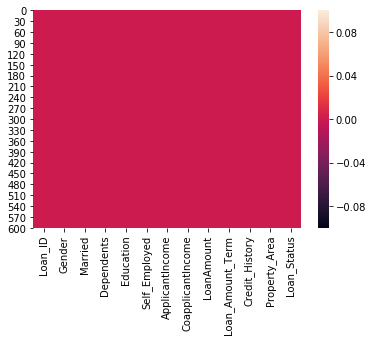

In [55]:
sb.heatmap(df.isnull())

- Now we can we that our dataset is not having any missing values. So we can move further

In [56]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### As we can see there are some are categorical columns and some are numerical columns so we have to encode the categorical columns, so we can apply machine learning technique's

In [57]:
from sklearn.preprocessing import LabelEncoder
x1= LabelEncoder()
df['Gender'] = x1.fit_transform(df['Gender'])

In [58]:
from sklearn.preprocessing import LabelEncoder
x1= LabelEncoder()
df['Married'] = x1.fit_transform(df['Married'])

In [59]:
from sklearn.preprocessing import LabelEncoder
x1= LabelEncoder()
df['Education'] = x1.fit_transform(df['Education'])

In [60]:
from sklearn.preprocessing import LabelEncoder
x1= LabelEncoder()
df['Self_Employed'] = x1.fit_transform(df['Self_Employed'])

In [61]:
from sklearn.preprocessing import LabelEncoder
x1= LabelEncoder()
df['Loan_Amount_Term'] = x1.fit_transform(df['Loan_Amount_Term'])

In [62]:
from sklearn.preprocessing import LabelEncoder
x1= LabelEncoder()
df['Property_Area'] = x1.fit_transform(df['Property_Area'])

In [63]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
x1= LabelEncoder()
df['Loan_Status'] = x1.fit_transform(df['Loan_Status'])

In [65]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1


#### Now our dataset is ready for applying Machine Learning Technique

- As In our dataset there is a Labelled data/Target given , so this comes under Supervised Machine Learning Types and if Target variable's is not avialable then it will comes under Unsupervised Mcahine Learning Types
    
- We can see that our Target Variable is Categorical types so it's fall's under Classification Technique's.


### Model Building

In [66]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1


In [67]:
# Independent Variables

X = df.drop(["Loan_Status","Loan_ID"],axis = 1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,8,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,8,1.0,2


In [68]:
# Dependent Variale/Target Variale

Y = df['Loan_Status']
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [69]:
# Splitting Independent variable's and Dependent Variable into Training and Testing Dataset

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [71]:
print(x_train.shape)

(491, 11)


In [72]:
print(y_train.shape)

(491,)


In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)                             # here .fit() which calculate distances
print("KNN SCORE=",knn.score(x_test,y_test)*100)

prediction = knn.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print('Confusion Matrix is:',cm, sep='\n')

KNN SCORE= 67.47967479674797
Confusion Matrix is:
[[ 4 29]
 [11 79]]


In [74]:
k_list = []

for i in range(1,31):
    k_list.append(i)
    
print(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [75]:
mis_class=[]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)                                    # here .fit() which calculate distances
    #print("KNN SCORE=",knn.score(x_test,y_test)*100)
    prediction = knn.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    print('Confusion Matrix is:',cm, sep='\n')
    
    mis_class.append(np.mean(prediction!=y_test))
    

Confusion Matrix is:
[[ 8 25]
 [32 58]]
Confusion Matrix is:
[[20 13]
 [48 42]]
Confusion Matrix is:
[[ 6 27]
 [22 68]]
Confusion Matrix is:
[[13 20]
 [30 60]]
Confusion Matrix is:
[[ 7 26]
 [18 72]]
Confusion Matrix is:
[[10 23]
 [20 70]]
Confusion Matrix is:
[[ 6 27]
 [16 74]]
Confusion Matrix is:
[[ 9 24]
 [18 72]]
Confusion Matrix is:
[[ 4 29]
 [11 79]]
Confusion Matrix is:
[[ 7 26]
 [13 77]]
Confusion Matrix is:
[[ 2 31]
 [ 9 81]]
Confusion Matrix is:
[[ 5 28]
 [10 80]]
Confusion Matrix is:
[[ 4 29]
 [ 8 82]]
Confusion Matrix is:
[[ 5 28]
 [ 9 81]]
Confusion Matrix is:
[[ 2 31]
 [ 8 82]]
Confusion Matrix is:
[[ 3 30]
 [10 80]]
Confusion Matrix is:
[[ 1 32]
 [ 7 83]]
Confusion Matrix is:
[[ 3 30]
 [11 79]]
Confusion Matrix is:
[[ 1 32]
 [ 6 84]]
Confusion Matrix is:
[[ 1 32]
 [ 7 83]]
Confusion Matrix is:
[[ 0 33]
 [ 5 85]]
Confusion Matrix is:
[[ 0 33]
 [ 7 83]]
Confusion Matrix is:
[[ 0 33]
 [ 4 86]]
Confusion Matrix is:
[[ 0 33]
 [ 6 84]]
Confusion Matrix is:
[[ 0 33]
 [ 5 85]]


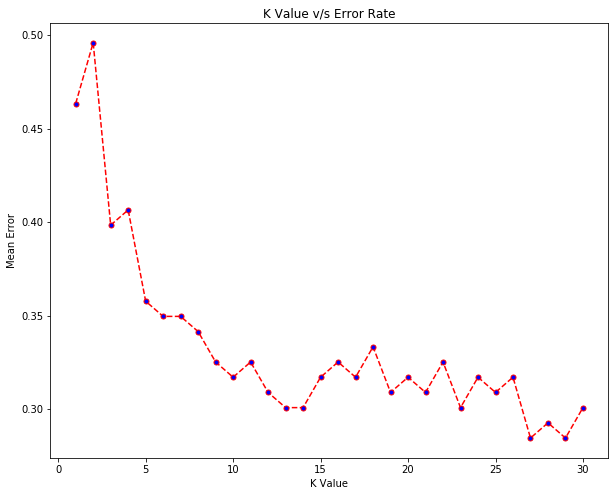

In [76]:
plt.figure(figsize=(10,8))
plt.plot(k_list,mis_class,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=5)
plt.title('K Value v/s Error Rate')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


In [77]:
from sklearn import metrics
probs = knn.predict_proba(x_test)
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.5138047138047138


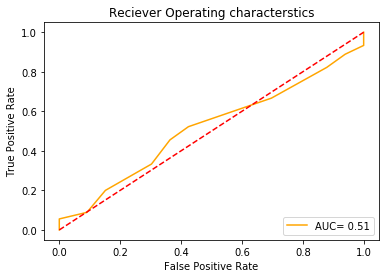

In [78]:
plt.title('Reciever Operating characterstics')
plt.plot(fpr, tpr,'Orange',label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Applying logistic Regression

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [80]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\SHASHANK\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred = logreg.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix
 [[15 18]
 [ 2 88]]
Accuracy Score:  83.73983739837398


In [83]:
from sklearn import metrics
probs = logreg.predict_proba(x_test)
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.7168350168350168


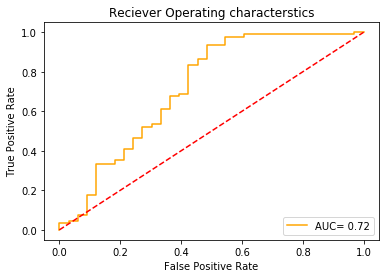

In [84]:
plt.title('Reciever Operating characterstics')
plt.plot(fpr, tpr,'Orange',label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Applying Decision Tree

In [85]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [86]:
clf = DecisionTreeClassifier(criterion = "gini")
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
y_pred = clf.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics                             #Import scikit-learn metrics module for accuracy calculation

cm = confusion_matrix(y_test,y_pred)

print('Confusion Matrix is:',cm, sep='\n')

# Model Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Confusion Matrix is:
[[13 20]
 [22 68]]
Accuracy: 65.85365853658537


In [89]:
from sklearn import metrics
probs = clf.predict_proba(x_test)
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.5747474747474748


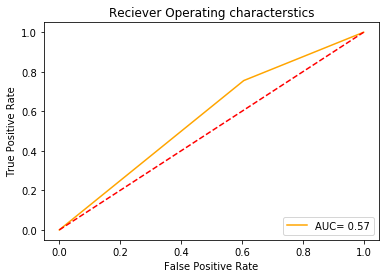

In [90]:
plt.title('Reciever Operating characterstics')
plt.plot(fpr, tpr,'Orange',label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### Applying Decision Tree with Hyperparameter 

In [91]:
clf1 = DecisionTreeClassifier(criterion = "gini", splitter = 'random',
                             max_leaf_nodes=3, min_samples_leaf = 2,
                             max_depth = 4)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [92]:
y_pred1 = clf1.predict(x_test)

In [93]:
cm1 = confusion_matrix(y_test,y_pred)

print('Confusion Matrix is:',cm, sep='\n')
print("Accuracy_new:",metrics.accuracy_score(y_test, y_pred1)*100)

Confusion Matrix is:
[[13 20]
 [22 68]]
Accuracy_new: 82.92682926829268


## Applying Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred),sep='\n')
print("Accuracy Score: ",accuracy_score(y_test, y_pred)*100)

Confusion Matrix: 
[[14 19]
 [ 8 82]]
Accuracy Score:  78.04878048780488


In [96]:
from sklearn import metrics
probs = rf.predict_proba(x_test)
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.7747474747474747


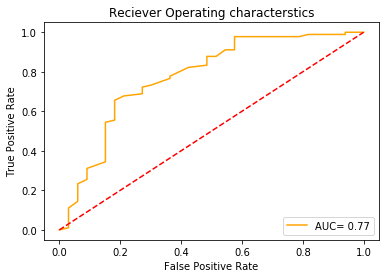

In [97]:
plt.title('Reciever Operating characterstics')
plt.plot(fpr, tpr,'Orange',label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## AdaBoostClassifier

In [98]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred),sep='\n')
print("Accuracy Score: ",accuracy_score(y_test, y_pred)*100)

Confusion Matrix: 
[[17 16]
 [ 5 85]]
Accuracy Score:  82.92682926829268


In [99]:
from sklearn import metrics
probs = ad.predict_proba(x_test)
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.7900673400673401


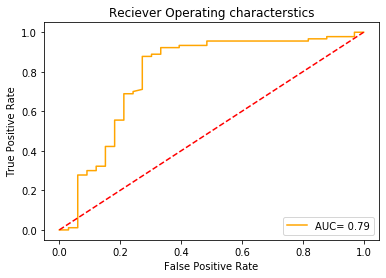

In [100]:
plt.title('Reciever Operating characterstics')
plt.plot(fpr, tpr,'Orange',label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Gradient Boosting Classifier

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred),sep='\n')
print("Accuracy Score: ",accuracy_score(y_test, y_pred)*100)

Confusion Matrix: 
[[16 17]
 [ 6 84]]
Accuracy Score:  81.30081300813008


In [102]:
from sklearn import metrics
probs = gb.predict_proba(x_test)
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.8043771043771044


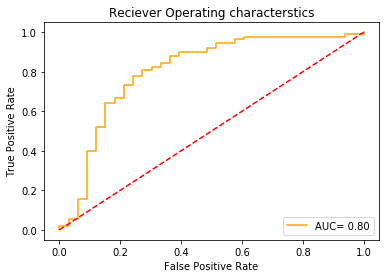

In [103]:
plt.title('Reciever Operating characterstics')
plt.plot(fpr, tpr,'Orange',label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()